In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 1. Loading and Preparing Data for Analysis

In [68]:
# Définir une fonction de conversion pour la colonne datetime
def parse_datetime(date_string):
    return pd.to_datetime(date_string)

# Spécifier les types de données et les convertisseurs
dtype = {'invoice': str, 'object': int, 'stock_code': object, 'description': object, 'quantity': int, 'unit_price': float, 'customer_id': object, 'country': object}
converters = {'invoice_date': parse_datetime}

# Charger le fichier CSV en utilisant les types de données et les convertisseurs
data = pd.read_csv("../data/rfm.csv", dtype=dtype, converters=converters)

# Vérifier les types de données
print(data.dtypes)

recency            int64
frequency          int64
monetary         float64
payed_amount     float64
refund_amount    float64
pourcentage      float64
dtype: object


### 2. Exploring Data Types and Converters

In [69]:
# Spécifier les types de données et les convertisseurs
dtype = {'invoice_date': int,'invoice': int, 'total_price': float}

# Charger le fichier CSV en utilisant les types de données et les convertisseurs
rfm = pd.read_csv("../data/rfm_data.csv", dtype=dtype)

# Vérifier les types de données
print(rfm.dtypes)

customer_id     float64
invoice_date      int64
invoice           int64
total_price     float64
dtype: object


In [70]:
# Display RFM
rfm

,customer_id,invoice_date,invoice,total_price
0,12346.0,326,17,-51.74
1,12347.0,3,8,4921.53
2,12348.0,76,5,2019.40
3,12349.0,19,5,4404.54
4,12350.0,311,1,334.40
...,...,...,...,...
5937,18283.0,4,22,2664.90
5938,18284.0,430,2,436.68
5939,18285.0,661,1,427.00
5940,18286.0,477,3,1188.43


In [71]:
# Rename column titles as RFM
rfm.rename(columns={'invoice_date': 'Recency', 'invoice': 'Frequency', 'total_price': 'Monetary'}, inplace=True)
rfm

,customer_id,Recency,Frequency,Monetary
0,12346.0,326,17,-51.74
1,12347.0,3,8,4921.53
2,12348.0,76,5,2019.40
3,12349.0,19,5,4404.54
4,12350.0,311,1,334.40
...,...,...,...,...
5937,18283.0,4,22,2664.90
5938,18284.0,430,2,436.68
5939,18285.0,661,1,427.00
5940,18286.0,477,3,1188.43


In [72]:
# Statistical summary of the RFM
rfm.describe()

,customer_id,Recency,Frequency,Monetary
count,5942.000000,5942.000000,5942.000000,5942.000000
mean,15316.500000,203.457085,7.552339,2741.499712
std,1715.451981,211.881245,15.972262,13676.639629
min,12346.000000,1.000000,1.000000,-25111.090000
25%,13831.250000,25.000000,2.000000,321.065000
50%,15316.500000,96.500000,4.000000,822.010000
75%,16801.750000,382.000000,8.000000,2142.195000
max,18287.000000,739.000000,510.000000,570380.610000


### 3. Visualizing Frequency and Monetary Relationship

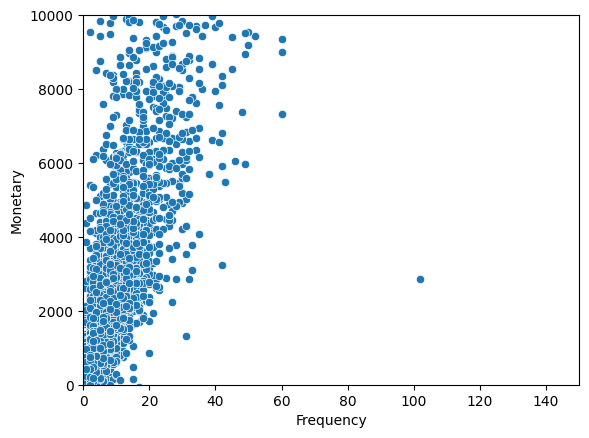

In [73]:
sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'])
plt.xlim([0,150])
plt.ylim([0,10000])
plt.show()

### 4. Boxplots for each

<Axes: >

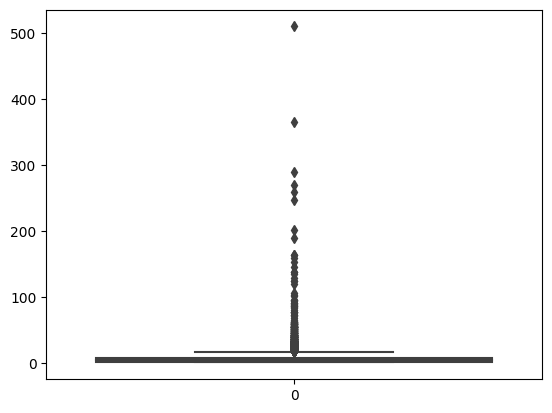

In [74]:
sns.boxplot(rfm['Frequency'])

<Axes: >

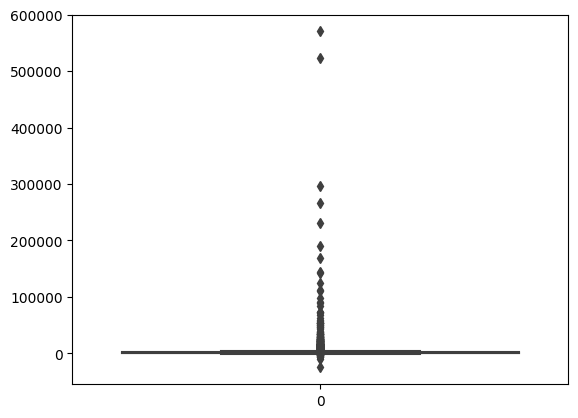

In [75]:
sns.boxplot(rfm.Monetary)

<Axes: >

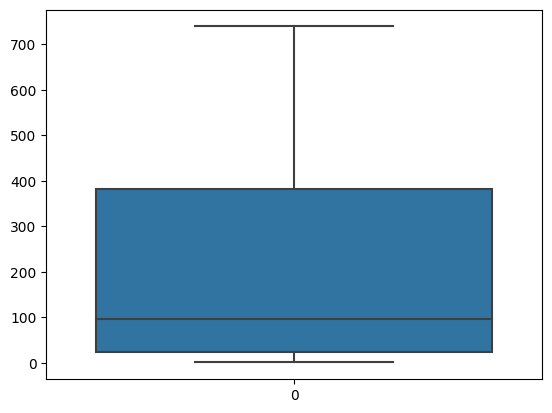

In [76]:
sns.boxplot(rfm.Recency)

### 5. 3D Scatterplot of Recency, Frequency, and Monetary

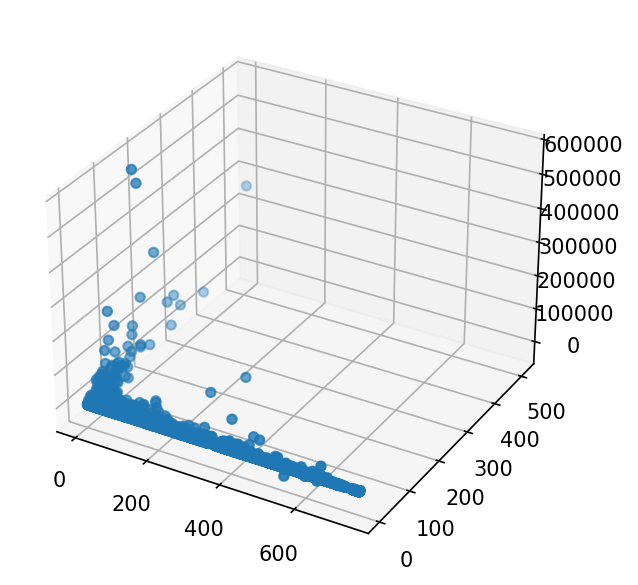

In [77]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(rfm.Recency, rfm.Frequency, rfm.Monetary)
# ax.view_init(30,30)

### 6. Removing Outliers using Z-Score and display a 3D scatterplot

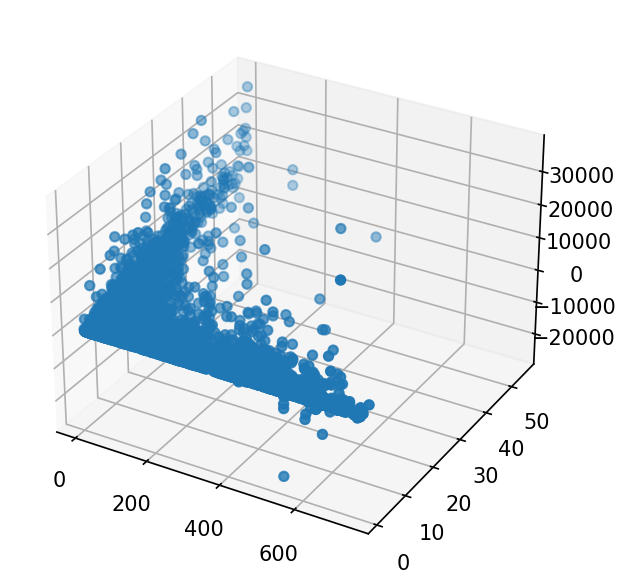

In [78]:
from scipy import stats
c = ['Recency', 'Frequency', 'Monetary']
# rfm.shape
rfmno = rfm[c][(np.abs(stats.zscore(rfm[c])) < 3).all(axis=1)]

# 3D scatterplot of Recency, Frequency and Monetary
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(rfmno.Recency, rfmno.Frequency, rfmno.Monetary)
# ax.view_init(30,30)


In [79]:
# Display RFM
rfm

,customer_id,Recency,Frequency,Monetary
0,12346.0,326,17,-51.74
1,12347.0,3,8,4921.53
2,12348.0,76,5,2019.40
3,12349.0,19,5,4404.54
4,12350.0,311,1,334.40
...,...,...,...,...
5937,18283.0,4,22,2664.90
5938,18284.0,430,2,436.68
5939,18285.0,661,1,427.00
5940,18286.0,477,3,1188.43


### 7. Scaling the Data

In [92]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# rfms = StandardScaler().fit(rfm[c]).transform(rfm[c])
rfms = RobustScaler().fit(rfm[c]).transform(rfm[c])

rfms = pd.DataFrame(rfms, columns=c)
rfmsno = rfms[c][np.abs(rfms[c] < 3).all(axis=1)]
rfmsno

,Recency,Frequency,Monetary
0,0.642857,2.166667,-0.479785
1,-0.261905,0.666667,2.251086
2,-0.057423,0.166667,0.657498
3,-0.217087,0.166667,1.967202
4,0.600840,-0.500000,-0.267751
...,...,...,...
5936,-0.247899,-0.166667,-0.354401
5938,0.934174,-0.333333,-0.211588
5939,1.581232,-0.500000,-0.216904
5940,1.065826,-0.166667,0.201205


### 8. Clustering Using K-Means

    Evaluating K-Means Performance by Cluster Number

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

Text(0.5, 1.0, 'KMeans Performance By Cluster Number')

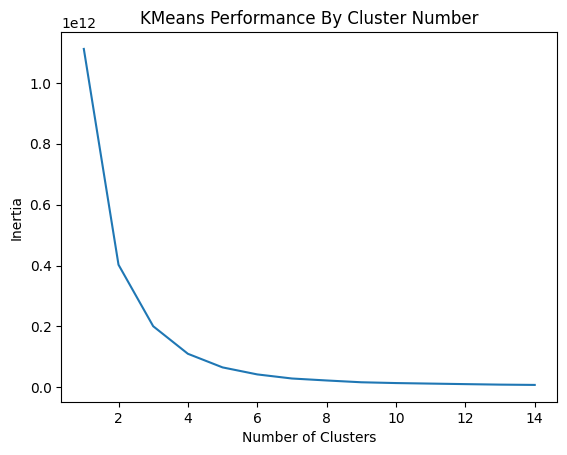

In [93]:
from sklearn.cluster import KMeans

plt.figure(dpi=100)
inertias = []
for i in range(1,15):
    inertias.append(KMeans(n_clusters = i).fit(rfm[c]).inertia_)
plt.plot(range(1,15), inertias)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('KMeans Performance By Cluster Number')

    Assigning Clusters to Customers

In [94]:
kp = pd.Series(KMeans(n_clusters = 4, random_state=10, max_iter=3000).fit(rfms[c]).predict(rfms[c]))
rfm['Cluster'] = kp

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [95]:
rfm.Cluster.value_counts()

0    5839
3      91
2      10
1       2
Name: Cluster, dtype: int64

    Visualizing Customer Clusters in 3D

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


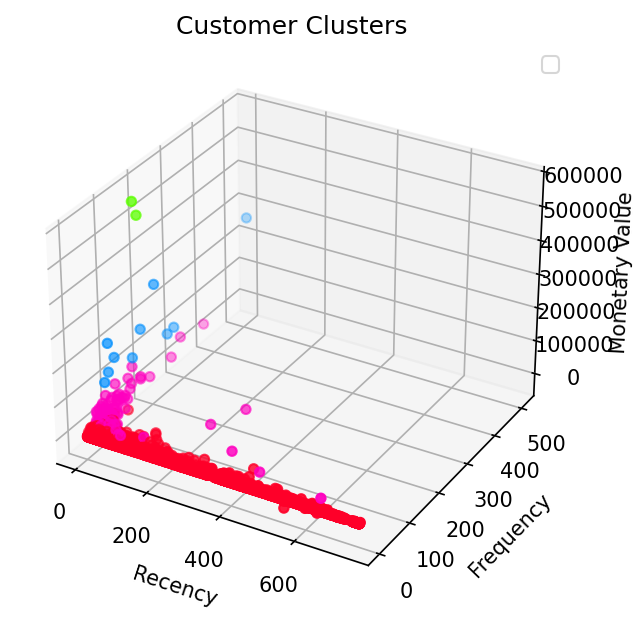

In [96]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(rfm.Recency, rfm.Frequency, rfm.Monetary, c=rfm.Cluster.values, cmap='gist_rainbow')
plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.title('Customer Clusters')
plt.legend()

    Analyzing Cluster Characteristics
    - Display the means 

In [97]:
rfm[c + ['Cluster']].groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,206.493406,6.237712,1760.730143
1,1.500000,158.500000,546861.340000
2,6.600000,177.500000,178309.048000
3,34.703297,69.912088,34420.602451


    Visualizing Customer Clusters based on Frequency and Monetary

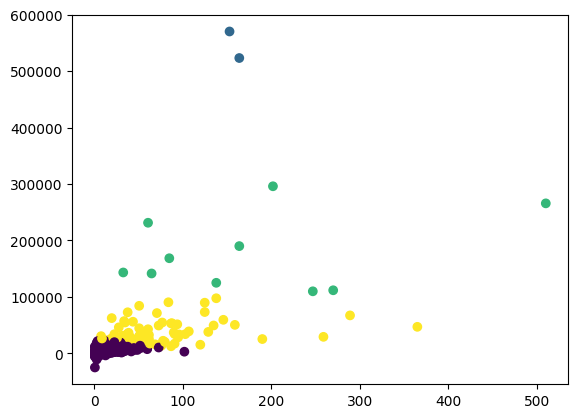

In [98]:
plt.scatter(rfm.Frequency, rfm.Monetary,c=rfm.Cluster)

### 9. Analysis of clusters formed

    Average Recency, Frequency and Monetary by Cluster

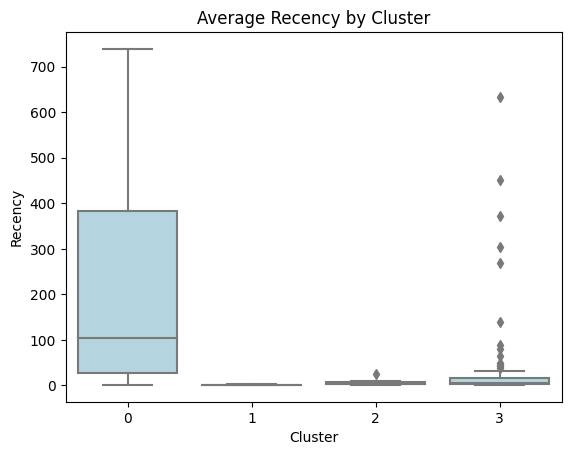

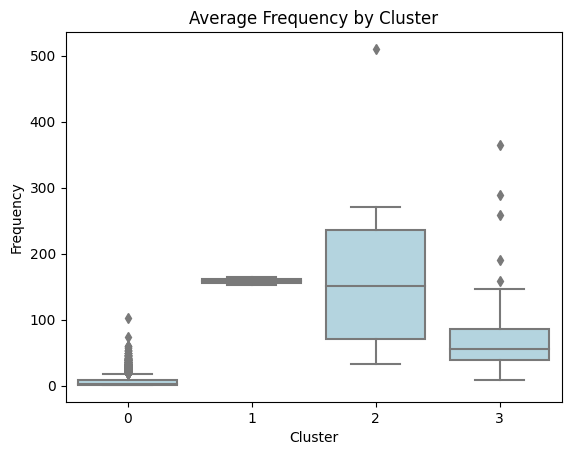

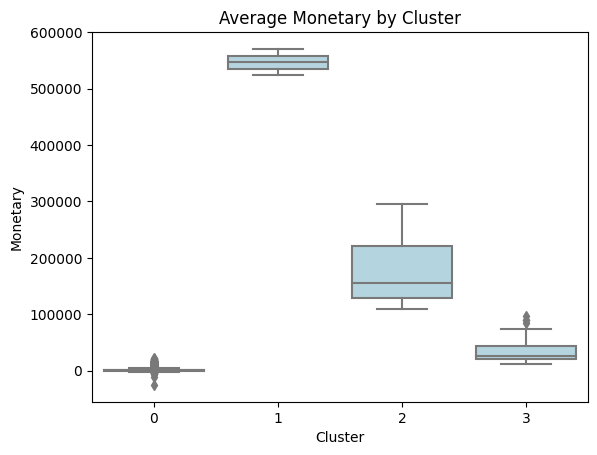

In [103]:
for col in c:
    plt.figure(dpi=100)
    plt.title('Average ' + col + ' by Cluster')
    sns.boxplot(data=rfm, x='Cluster', y=col, color='lightblue' )
    plt.show()

Text(0.5, 1.0, 'Total Monetary Value by Cluster')

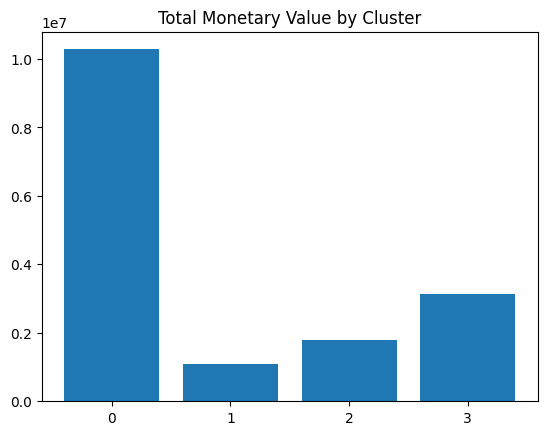

In [102]:
plt.figure(dpi=100)
plt.bar(rfm.groupby('Cluster', as_index=False)['Monetary'].sum().Cluster.astype(str), rfm.groupby('Cluster', as_index=False)['Monetary'].sum().Monetary)
plt.title('Total Monetary Value by Cluster')

Text(0, 0.5, 'Number of Customers')

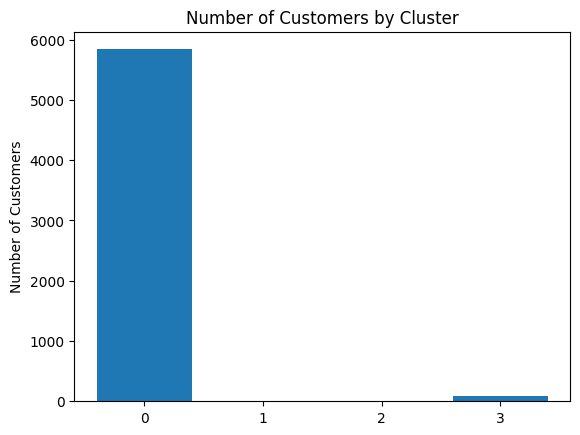

In [101]:
plt.figure(dpi=100)
plt.bar(rfm.groupby('Cluster', as_index=False)['Monetary'].count().Cluster.astype(str), rfm.groupby('Cluster', as_index=False)['Monetary'].count().Monetary)
plt.title('Number of Customers by Cluster')
plt.ylabel('Number of Customers')